<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/SL2/proyecto_final_SL2_problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final 
# Statistical Learning II
Jairo O. Salazar
Carnet:

Set de datos, poster y Paper: 

https://drive.google.com/drive/folders/1rZccmCOakc_T2O-JBJ2Rz_BkWhIjSLUP?usp=sharing


# Parte 1 - Feed Forward Network

**Heart Failure Prediction**

Aunque no soy medico, este problema me interesa bastante, ya que mi padre fallecio en 2018 de un ataque cardiaco aun habiendolo internado dias antes, tengo la impresion que los examenes que le practicaron fueron insuficientes para detectar a tiempo la dolencia. 

Las enfermedades Cardiovasculares son la causa no. 1 de muerte globalmente, y se estima que mueren 17.9 millones de personas cada año alrededor del mundo, el 31% de estas personas se estima es por un ataque al corazon.

El datase a analizar contiene 12 caracteristicas que son usadas para predecir la mortalidad por un fallo cardiaco.

Las personas con una enfermedad cardiovascular o que tienen un alto riesgo de padecer una enfermedad debido a la presencia de factores como la hipertension, diabetes y hyperlimidaemia) necesitan deteccion temprana y aca es donde el machine learning puede ser de gran ayuda.

Este sera un problema de clasificacion, en base a 12 caracteristicas poder predecir si se esta en riesgo de un evento mortal o no. Las 12 caracteristicas contenidas en el dataset son las siguientes:

1. *Edad :* Edad del paciente
2. *Creatinina phosphokinasea:* Es una enzima producida por el cuerpo. Un nivel alto de esta enzima puede indicar daño o estress al tejido muscular, el corazon o el cerebro.
3. *Diabetes: * Presencia de Diabetes es un factor de riesgo cardiaco muy comun.
4. *eun:* Es una medida que expresa el porcentaje de cuanda sangre puede el ventriculo izquierdo empujar afuera del corazon con cada contraccion.

5. *presion arterial alta: * Es un indicador si el paciente presenta presion arterial alta.

6. *platelets: * numero de plaquetas presentes en la sangre.

7. *Serum Creatinina: * Es una medida de que tan bien el higado esta limpieando la sangre. Mientras menor sea este valor mejor.

8. *Serum Sodium: * Es un test para determinar que tanto sodio tenemos en la sangre, es particularmente importante para los nervios y la funcion de los musculos.

9. *Sexo: * Hombre o mujer

10. *Smoking: * Fumador o no fumador.

11. *Anemia:*  deficiencia en el numero o calidad de los globulos rojos en el cuerpo.

12. *Time: * tiempo desde la ultima visita o evento cardiaco.


In [1]:
from keras import models
from keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Bidirectional





In [2]:
!pip install graphviz 
!apt-get install graphviz

!pip install ann_visualizer
!apt-get install ann_visualizer

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=a5caff479c4b071e05e49933d2bd8b2f037976b99dbcfbf7ed7340a449c692a2
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package ann_visualizer


In [3]:
from ann_visualizer.visualize import ann_viz;

In [4]:
Dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
Dataset.columns = ['age','anaemia','creatinine_phosphokinasea','Diabetes','ejection_fraction','high_blood_pressure','platalets','serum_creatinine','serum_sodium','sex','smoking','time','Death_event']
Dataset.head()
#print(Dataset.shape)

,age,anaemia,creatinine_phosphokinasea,Diabetes,ejection_fraction,high_blood_pressure,platalets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Preprocessing

- Revision de valores faltantes, revision de variables categoricas (vertorizacion).
- Normalizacion de valores

In [5]:
Dataset.isnull().sum()

#Revision de Datos faltantes ninguno.

age                          0
anaemia                      0
creatinine_phosphokinasea    0
Diabetes                     0
ejection_fraction            0
high_blood_pressure          0
platalets                    0
serum_creatinine             0
serum_sodium                 0
sex                          0
smoking                      0
time                         0
Death_event                  0
dtype: int64

In [6]:
#Value Normalization
datasetNorm = Dataset
for column in datasetNorm.columns:
    datasetNorm[column] = datasetNorm[column]  / datasetNorm[column].abs().max()
      
# view normalized data
display(datasetNorm)

,age,anaemia,creatinine_phosphokinasea,Diabetes,ejection_fraction,high_blood_pressure,platalets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
0,0.789474,0.0,0.074036,0.0,0.2500,1.0,0.311765,0.202128,0.878378,1.0,0.0,0.014035,1.0
1,0.578947,0.0,1.000000,0.0,0.4750,0.0,0.309833,0.117021,0.918919,1.0,0.0,0.021053,1.0
2,0.684211,0.0,0.018573,0.0,0.2500,0.0,0.190588,0.138298,0.871622,1.0,1.0,0.024561,1.0
3,0.526316,1.0,0.014120,0.0,0.2500,0.0,0.247059,0.202128,0.925676,1.0,0.0,0.024561,1.0
4,0.684211,1.0,0.020354,1.0,0.2500,0.0,0.384706,0.287234,0.783784,0.0,0.0,0.028070,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.652632,0.0,0.007760,1.0,0.4750,1.0,0.182353,0.117021,0.966216,1.0,1.0,0.947368,0.0
295,0.578947,0.0,0.231523,0.0,0.4750,0.0,0.317647,0.127660,0.939189,0.0,0.0,0.950877,0.0
296,0.473684,0.0,0.262053,1.0,0.7500,0.0,0.872941,0.085106,0.932432,0.0,0.0,0.975439,0.0
297,0.473684,0.0,0.306958,0.0,0.4750,0.0,0.164706,0.148936,0.945946,1.0,1.0,0.982456,0.0


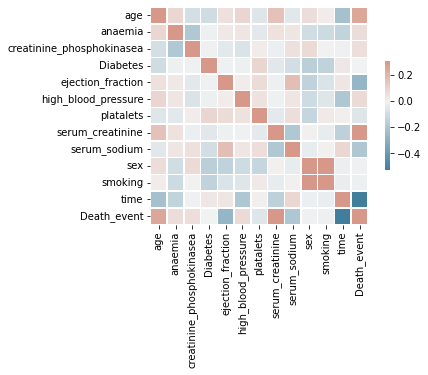

In [7]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(datasetNorm.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [8]:
datasetNorm.corr()

,age,anaemia,creatinine_phosphokinasea,Diabetes,ejection_fraction,high_blood_pressure,platalets,serum_creatinine,serum_sodium,sex,smoking,time,Death_event
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinasea,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
Diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platalets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
model = models.Sequential()
#act = keras.layers.LeakyReLU(alpha=0.3)
act = keras.layers.LeakyReLU(alpha=0.3)
#model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dense(12,activation=act))

model.add(layers.Dense(12,activation=act))

model.add(layers.Dense(8,activation=act))

model.add(layers.Dense(8,activation='tanh'))

model.add(layers.Dense(4,activation='tanh'))
#model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(4,activation='tanh'))
#model.add(layers.Dense(4,activation='relu'))
#model.add(layers.Dense(2,activation='relu'))
#model.add(layers.Dense(2,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model.build(input_shape=(299,12))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (299, 12)                 156       
_________________________________________________________________
dense_1 (Dense)              (299, 12)                 156       
_________________________________________________________________
dense_2 (Dense)              (299, 8)                  104       
_________________________________________________________________
dense_3 (Dense)              (299, 8)                  72        
_________________________________________________________________
dense_4 (Dense)              (299, 4)                  36        
_________________________________________________________________
dense_5 (Dense)              (299, 4)                  20        
_________________________________________________________________
dense_6 (Dense)              (299, 1)                  5

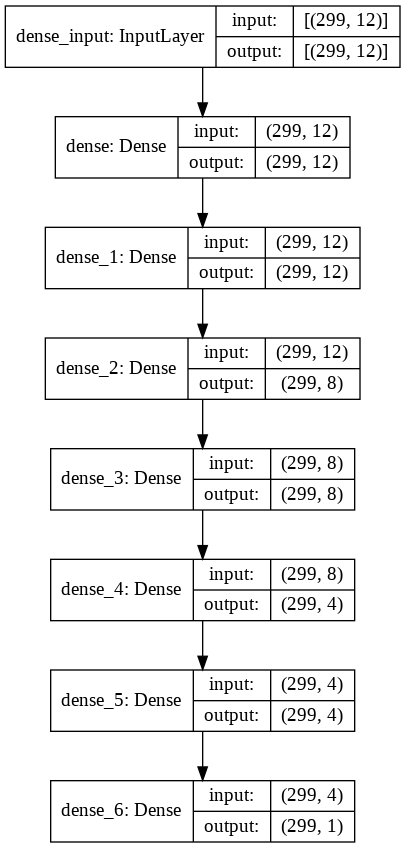

In [11]:
img_file = './model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)
  

In [12]:
ann_viz(model, title="Heart Failure Prediction")

In [13]:
y = pd.DataFrame(datasetNorm["Death_event"])
x = datasetNorm.drop('Death_event', inplace=True, axis=1)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datasetNorm, y, train_size = 0.8, shuffle = True, random_state = 2)


In [15]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Model_Check_FFN = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_FFN_model")

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(datasetNorm, y, train_size = 0.8, shuffle = True, random_state = 2)

model.compile(optimizer = 'adamax',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=300,callbacks=[Early_Stopper,Model_Check_FFN],validation_data=(x_test, y_test))

Epoch 1/300
8/8 [==============================] - 2s 64ms/step - loss: 0.6582 - accuracy: 0.6695 - val_loss: 0.6390 - val_accuracy: 0.7167


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6695 - val_loss: 0.6322 - val_accuracy: 0.7167
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.6695 - val_loss: 0.6273 - val_accuracy: 0.7167
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6445 - accuracy: 0.6695 - val_loss: 0.6240 - val_accuracy: 0.7167
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6426 - accuracy: 0.6695 - val_loss: 0.6217 - val_accuracy: 0.7167
Epoch 6/300
8/8 [==============================] - 0s 8ms/step - loss: 0.6412 - accuracy: 0.6695 - val_loss: 0.6197 - val_accuracy: 0.7167
Epoch 7/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6400 - accuracy: 0.6695 - val_loss: 0.6181 - val_accuracy: 0.7167
Epoch 8/300
8/8 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.6695 - val_loss: 0.6165 - val_accuracy: 0.7167
Epoch 9/300
8/8 [==========

INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 67/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.6778 - val_loss: 0.5942 - val_accuracy: 0.7333
Epoch 68/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.6946 - val_loss: 0.5931 - val_accuracy: 0.7667


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 69/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5876 - accuracy: 0.6987 - val_loss: 0.5911 - val_accuracy: 0.7667
Epoch 70/300
8/8 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.7113 - val_loss: 0.5891 - val_accuracy: 0.7667
Epoch 71/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5829 - accuracy: 0.7322 - val_loss: 0.5876 - val_accuracy: 0.7667
Epoch 72/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.7406 - val_loss: 0.5852 - val_accuracy: 0.7667
Epoch 73/300
8/8 [==============================] - 0s 6ms/step - loss: 0.5780 - accuracy: 0.7406 - val_loss: 0.5828 - val_accuracy: 0.7667
Epoch 74/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5756 - accuracy: 0.7448 - val_loss: 0.5808 - val_accuracy: 0.7667
Epoch 75/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.7531 - val_loss: 0.5785 - val_accuracy: 0.7667
Epoch 76/300
8/8 [==

INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 95/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5081 - accuracy: 0.8075 - val_loss: 0.4967 - val_accuracy: 0.8167


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 96/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5042 - accuracy: 0.8075 - val_loss: 0.4915 - val_accuracy: 0.8167
Epoch 97/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5006 - accuracy: 0.8075 - val_loss: 0.4867 - val_accuracy: 0.8167
Epoch 98/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4977 - accuracy: 0.8117 - val_loss: 0.4817 - val_accuracy: 0.8167
Epoch 99/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4942 - accuracy: 0.8117 - val_loss: 0.4765 - val_accuracy: 0.8333


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 100/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4910 - accuracy: 0.8117 - val_loss: 0.4718 - val_accuracy: 0.8333
Epoch 101/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4871 - accuracy: 0.8117 - val_loss: 0.4677 - val_accuracy: 0.8333
Epoch 102/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.8201 - val_loss: 0.4628 - val_accuracy: 0.8333
Epoch 103/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4809 - accuracy: 0.8201 - val_loss: 0.4587 - val_accuracy: 0.8500


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 104/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4773 - accuracy: 0.8201 - val_loss: 0.4541 - val_accuracy: 0.8500
Epoch 105/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.8243 - val_loss: 0.4497 - val_accuracy: 0.8667


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


INFO:tensorflow:Assets written to: ./my_FFN_model/assets


Epoch 106/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.8201 - val_loss: 0.4454 - val_accuracy: 0.8667
Epoch 107/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4684 - accuracy: 0.8243 - val_loss: 0.4416 - val_accuracy: 0.8667
Epoch 108/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4656 - accuracy: 0.8201 - val_loss: 0.4380 - val_accuracy: 0.8667
Epoch 109/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.8243 - val_loss: 0.4343 - val_accuracy: 0.8667
Epoch 110/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4600 - accuracy: 0.8285 - val_loss: 0.4301 - val_accuracy: 0.8667
Epoch 111/300
8/8 [==============================] - 0s 8ms/step - loss: 0.4582 - accuracy: 0.8410 - val_loss: 0.4277 - val_accuracy: 0.8500
Epoch 112/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4548 - accuracy: 0.8494 - val_loss: 0.4238 - val_accuracy: 0.8667
Epoch 113/300

In [16]:
model.evaluate(x_test,y_test,len(x_test))

1/1 [==============================] - 0s 132ms/step - loss: 0.3761 - accuracy: 0.8500


[0.3760574758052826, 0.8500000238418579]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

<Figure size 1584x720 with 0 Axes>

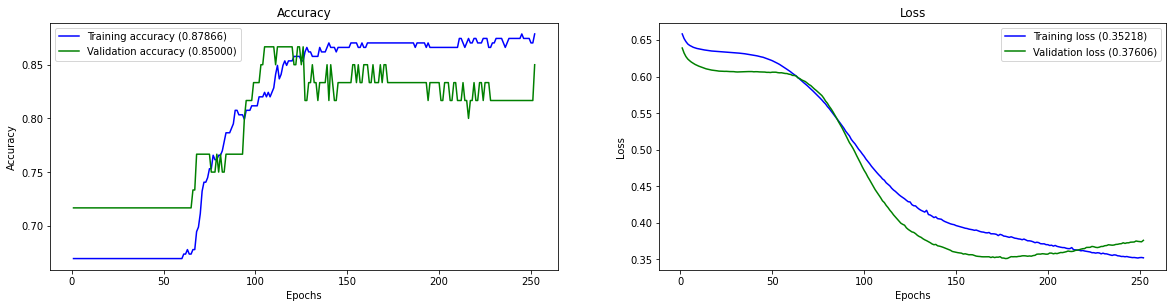

In [18]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# plot history
plot_history(history)